In [1]:
from importlib import reload
import matplotlib.pyplot as plt

def init():
    from ptycho import params as p
    p.cfg['positions.provided'] = False
    p.cfg['data_source'] = 'lines'
    p.cfg['set_phi'] = False
    p.cfg['nepochs'] = 60

    p.cfg['offset'] = 4
    p.cfg['max_position_jitter'] = 3
    p.cfg['output_prefix'] = 'lines3'

    p.cfg['gridsize'] = 2
    p.cfg['n_filters_scale'] = 2
    p.cfg['object.big'] = True
    p.cfg['intensity_scale.trainable'] = True
    p.cfg['probe.trainable'] = False
    
    p.cfg['outer_offset_train'] = 8
    p.cfg['outer_offset_test'] = 20
    p.cfg['nimgs_train'] = 2
    p.cfg['nimgs_test'] = 2
    
init()
from ptycho.evaluation import save_metrics
from ptycho.evaluation import trim
from ptycho import tf_helper as hh

from ptycho import params as p
from ptycho import generate_data as init

2023-11-23 16:50:16.788549: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-23 16:50:16.885273: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-23 16:50:17.255436: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/ollie/anaconda3/envs/tf/lib/
2023-11-23 16:50:17.255477: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.

In [3]:
p.cfg['outer_offset_train'], p.cfg['outer_offset_test'], init.X_train.shape

(8, 20, (13448, 64, 64, 4))

In [4]:
from ptycho import tf_helper as hh

## Full PINN model, best params:

In [7]:
from ptycho import params as p
p.cfg['data_source'] = 'lines'
p.cfg['offset'] = 4
p.cfg['max_position_jitter'] = 10
p.cfg['output_prefix'] = 'lines2'

p.cfg['gridsize'] = 2
p.cfg['n_filters_scale'] = 2
p.cfg['object.big'] = True
p.cfg['intensity_scale.trainable'] = True

from ptycho import train, model
# reload(model)
# reload(train)

# print(p.cfg)
from ptycho.train import *

input shape (None, 64, 64, 1)
Instructions for updating:
Please pass an integer value for `reinterpreted_batch_ndims`. The current behavior corresponds to `reinterpreted_batch_ndims=tf.size(distribution.batch_shape_tensor()) - 1`.
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 64, 64, 4)]  0           []                               
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 64, 64, 4)    0           ['input[0][0]']                  
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 64)   2368        ['tf.math.truediv[0][0]']        
                                                             

 padded_objs_with_offsets (Lamb  (None, None, None,   0          ['padded_obj_2[0][0]',           
 da)                            1)                                'input_positions[0][0]']        
                                                                                                  
 probe_illumination (ProbeIllum  ((None, 64, 64, 1),  4096       ['padded_objs_with_offsets[0][0]'
 ination)                        (1, 64, 64, 1))                 ]                                
                                                                                                  
 pred_amplitude (Lambda)        ((None, 64, 64, 1),  0           ['probe_illumination[0][0]']     
                                 (None, 64, 64, 1))                                               
                                                                                                  
 pred_diff_channels (Lambda)    (None, 64, 64, 4)    0           ['pred_amplitude[0][1]']         
          

2023-11-23 16:50:35.791827: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-11-23 16:50:35.791845: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-11-23 16:50:35.791865: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1664] Profiler found 1 GPUs
2023-11-23 16:50:35.794652: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcupti.so.11.2'; dlerror: libcupti.so.11.2: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/ollie/anaconda3/envs/tf/lib/
2023-11-23 16:50:35.844607: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-11-23 16:50:35.844696: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1798] CUPTI activity buffer flushed


Epoch 1/60
input shape (None, 64, 64, 1)
input shape (None, 64, 64, 1)


2023-11-23 16:50:41.129862: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2023-11-23 16:50:42.244470: I tensorflow/core/util/cuda_solvers.cc:179] Creating GpuSolver handles for stream 0x72e9e30


799/799 [==============================] - 13s 13ms/step - loss: 61934912.0000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 11.9956 - distribution_lambda_loss: 61934912.0000 - val_loss: 25301736.0000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 10.0831 - val_distribution_lambda_loss: 25301736.0000 - lr: 0.0010
Epoch 2/60
799/799 [==============================] - 9s 12ms/step - loss: 23143678.0000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 9.7219 - distribution_lambda_loss: 23143678.0000 - val_loss: 16785952.0000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 9.0416 - val_distribution_lambda_loss: 16785952.0000 - lr: 0.0010
Epoch 3/60
799/799 [==============================] - 9s 12ms/step - loss: 17912544.0000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 9.1099 - distribution_lambda_loss: 17912544.0000 - val_loss: 22659984.0000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 9.8797 - val_distributio

799/799 [==============================] - 9s 12ms/step - loss: 3191393.2500 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 4.9864 - distribution_lambda_loss: 3191393.2500 - val_loss: 3278545.2500 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 5.0433 - val_distribution_lambda_loss: 3278545.2500 - lr: 5.0000e-04
Epoch 24/60
799/799 [==============================] - 9s 12ms/step - loss: 3262829.2500 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 4.9639 - distribution_lambda_loss: 3262829.2500 - val_loss: 3065335.7500 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 4.9235 - val_distribution_lambda_loss: 3065335.7500 - lr: 5.0000e-04
Epoch 25/60
799/799 [==============================] - 10s 12ms/step - loss: 2970479.5000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 4.8309 - distribution_lambda_loss: 2970479.5000 - val_loss: 3464060.0000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 5.0209 - val_distribution_l

Epoch 45/60
799/799 [==============================] - 9s 12ms/step - loss: 1824488.3750 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 3.9344 - distribution_lambda_loss: 1824488.3750 - val_loss: 2113493.2500 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 4.1301 - val_distribution_lambda_loss: 2113493.2500 - lr: 1.2500e-04
Epoch 46/60
799/799 [==============================] - 9s 12ms/step - loss: 1803185.5000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 3.9136 - distribution_lambda_loss: 1803185.5000 - val_loss: 2182460.7500 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 4.2010 - val_distribution_lambda_loss: 2182460.7500 - lr: 1.2500e-04
Epoch 47/60
799/799 [==============================] - 9s 12ms/step - loss: 1805430.8750 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 3.9096 - distribution_lambda_loss: 1805430.8750 - val_loss: 2079409.1250 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 4.0959 - val_dis

In [16]:
from ptycho import train_pinn 

In [5]:
d = save_metrics(stitched_obj, YY_ground_truth, label = 'PINN,NLL,overlaps')
d
#d0 = d

subtracting mean -0.4370921
subtracting mean 0.0
mean scale adjustment: 4.345142
mean scale adjustment: 4.345142
performed by index method
performed by index method
performed by index method
mean scale adjustment: 1
mean scale adjustment: 1


{'mae': (0.050260376, 0.0038945454),
 'mse': (0.004162191, 2.4341458e-05),
 'psnr': (71.93758385238337, 94.26733791899946),
 'frc50': (165, nan)}

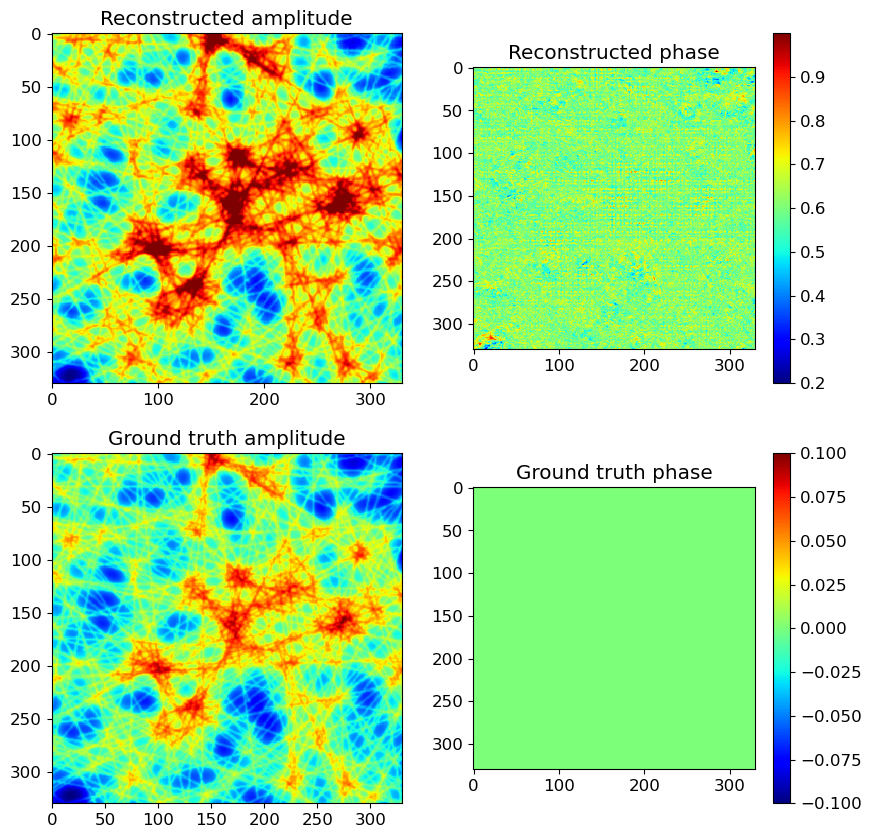

In [11]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# reconstructed amplitude images
img1 = axs[0, 0].imshow(np.absolute(stitched_obj)[0], cmap='jet', interpolation='none')
axs[0, 0].set_title('Reconstructed amplitude')

# reconstructed phase images
axs[0, 1].imshow(np.angle(stitched_obj)[0], cmap='jet')
fig.colorbar(img1, ax=axs[0, 1])
axs[0, 1].set_title('Reconstructed phase')

# ground truth amplitude images
img = axs[1, 0].imshow(np.absolute(init.YY_ground_truth), interpolation='none', cmap='jet')
axs[1, 0].set_title('Ground truth amplitude')

# ground truth phase images
img = axs[1, 1].imshow(np.angle(init.YY_ground_truth), interpolation='none', cmap='jet')
axs[1, 1].set_title('Ground truth phase')
fig.colorbar(img, ax=axs[1, 1])

phase min: -0.091108866 phase max: 0.04349985


/home/ollie/anaconda3/envs/tf/lib/python3.9/site-packages/ptychoPINN-0.0.0-py3.9.egg/ptycho/evaluation.py:80: RuntimeWarning: divide by zero encountered in log
  true_diffraction = np.log(X_test)[i, :, :, channel]


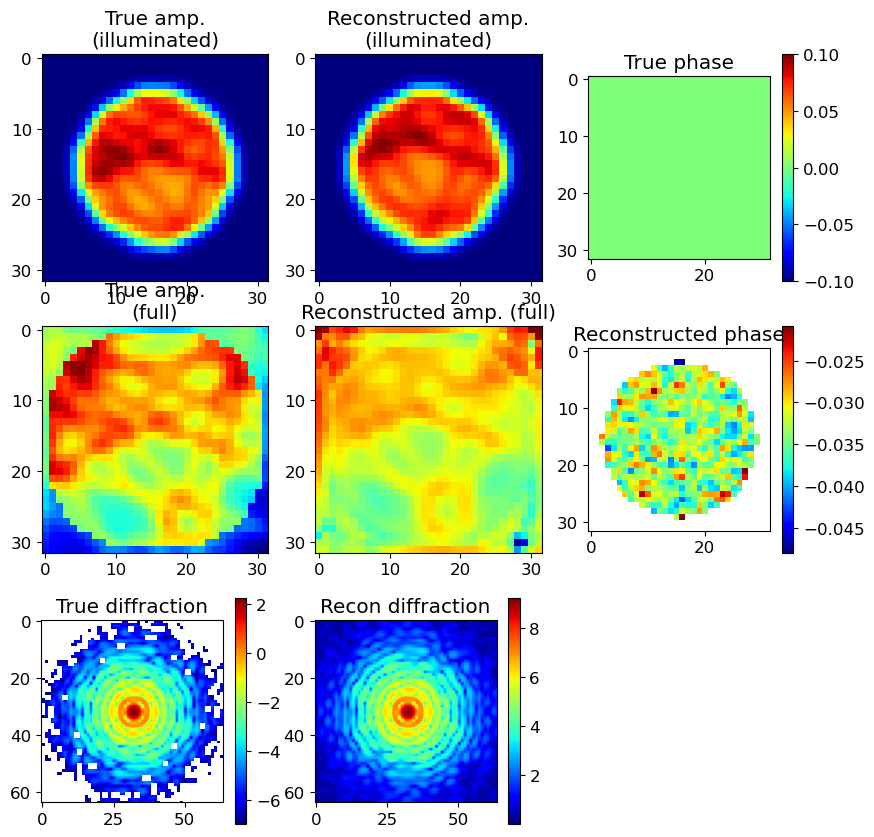

In [12]:
# i = 300
# from ptycho import evaluation
# evaluation.summarize(i, pred_amp + 1, reconstructed_obj, X_test, Y_I_test, Y_phi_test,
#                      np.absolute(p.get('probe')[:, :, 0]), 0);

from ptycho import evaluation
idxs = list(range(0, 100, 10))
ptychopinn_heatmaps = [evaluation.summarize(i, pred_amp, reconstructed_obj,
                    X_test, Y_I_test, Y_phi_test, np.absolute(p.get('probe'))[:, :, 0], 0) for i in idxs]

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


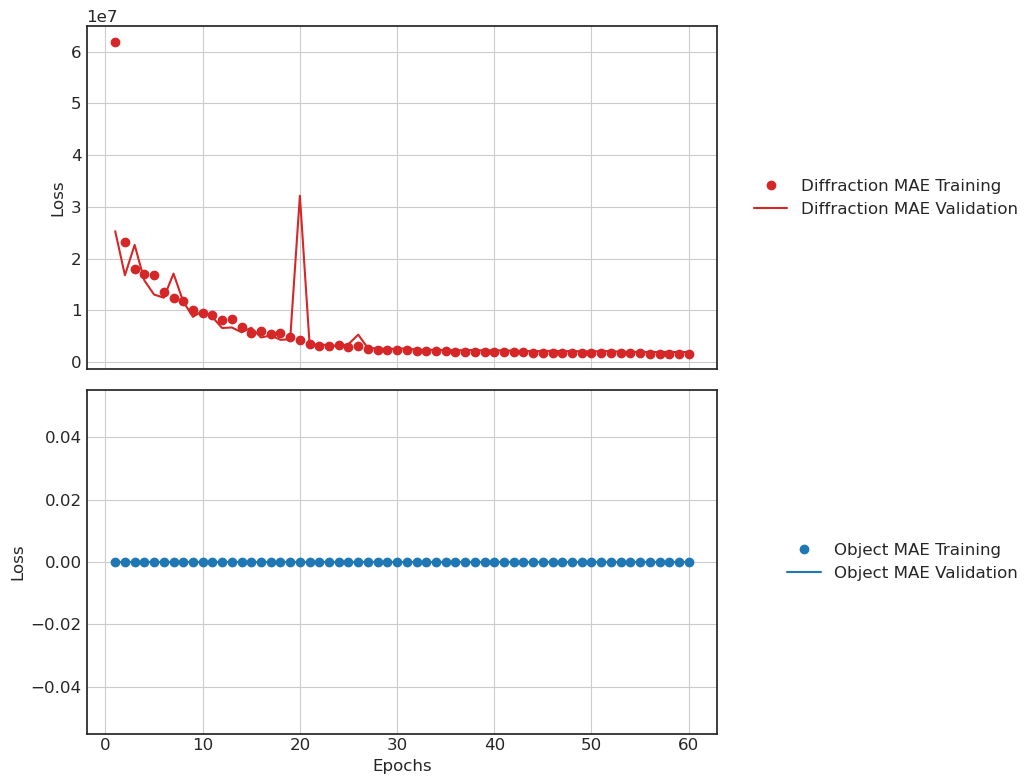

In [13]:
from ptycho import evaluation

evaluation.plt_metrics(history, metric2 = 'trimmed_obj_loss')

## PINN, NLL, no overlap:

In [14]:
from ptycho import train_pinn

In [25]:
p.cfg['gridsize'] = 1
p.cfg['nll_weight'] = 1.
p.cfg['mae_weight'] = 0.

reload(init)
reload(train.model)
reload(train_pinn)

# print(p.cfg)
from ptycho.generate_data import *
from ptycho.train import *;

input shape (None, 64, 64, 1)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 64, 64, 1)]  0           []                               
                                                                                                  
 tf.math.truediv (TFOpLambda)   (None, 64, 64, 1)    0           ['input[0][0]']                  
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 64)   640         ['tf.math.truediv[0][0]']        
                                                                                                  
 conv2d_1 (Conv2D)              (None, 64, 64, 64)   36928       ['conv2d[0][0]']                 
                                                                

 pred_amplitude (Lambda)        ((None, 64, 64, 1),  0           ['probe_illumination[0][0]']     
                                 (None, 64, 64, 1))                                               
                                                                                                  
 pred_diff_channels (Lambda)    (None, 64, 64, 1)    0           ['pred_amplitude[0][1]']         
                                                                                                  
 tf.math.multiply (TFOpLambda)  (None, 64, 64, 1)    0           ['pred_diff_channels[0][0]']     
                                                                                                  
 trimmed_obj (Lambda)           (None, 64, 64, 1)    0           ['padded_obj_2[0][0]']           
                                                                                                  
 distribution_lambda (Distribut  ((None, 64, 64, 1),  0          ['tf.math.multiply[0][0]']       
 ionLambda

2023-11-23 17:15:36.146127: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2023-11-23 17:15:36.146143: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2023-11-23 17:15:36.478494: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2023-11-23 17:15:36.478599: I tensorflow/core/profiler/backends/gpu/cupti_tracer.cc:1798] CUPTI activity buffer flushed


Loading result from memory cache.
Loading result from memory cache.
1.0000081
nphoton 8.962428
using nominal scan positions for training
Epoch 1/60
input shape (None, 64, 64, 1)
input shape (None, 64, 64, 1)
819/819 [==============================] - 10s 11ms/step - loss: 17918464.0000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 12.1421 - distribution_lambda_loss: 17918464.0000 - val_loss: 15134763.0000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 12.1520 - val_distribution_lambda_loss: 15134763.0000 - lr: 0.0010
Epoch 2/60
819/819 [==============================] - 9s 11ms/step - loss: 5639433.0000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 9.7581 - distribution_lambda_loss: 5639433.0000 - val_loss: 4036478.0000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 9.1661 - val_distribution_lambda_loss: 4036478.0000 - lr: 0.0010
Epoch 3/60
819/819 [==============================] - 9s 11ms/step - loss: 3937889.0000 - trimmed_obj_lo

Epoch 22/60
819/819 [==============================] - 9s 11ms/step - loss: 450911.1875 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 3.9051 - distribution_lambda_loss: 450911.1875 - val_loss: 521668.6562 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 4.0814 - val_distribution_lambda_loss: 521668.6562 - lr: 2.5000e-04
Epoch 23/60
819/819 [==============================] - 9s 11ms/step - loss: 446073.6250 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 3.8760 - distribution_lambda_loss: 446073.6250 - val_loss: 517378.8438 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 4.0158 - val_distribution_lambda_loss: 517378.8438 - lr: 2.5000e-04
Epoch 24/60
819/819 [==============================] - 9s 11ms/step - loss: 444875.9688 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 3.8497 - distribution_lambda_loss: 444875.9688 - val_loss: 478087.7500 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 3.9051 - val_distribution_l

819/819 [==============================] - 9s 11ms/step - loss: 301861.6562 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 3.2256 - distribution_lambda_loss: 301861.6562 - val_loss: 404635.4062 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 3.5064 - val_distribution_lambda_loss: 404635.4062 - lr: 1.0000e-04
Epoch 45/60
819/819 [==============================] - 9s 11ms/step - loss: 300104.2812 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 3.2145 - distribution_lambda_loss: 300104.2812 - val_loss: 357853.6875 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 3.3589 - val_distribution_lambda_loss: 357853.6875 - lr: 1.0000e-04
Epoch 46/60
819/819 [==============================] - 9s 11ms/step - loss: 298945.7500 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_loss: 3.2045 - distribution_lambda_loss: 298945.7500 - val_loss: 345292.5000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_loss: 3.3228 - val_distribution_lambda_loss: 

In [32]:
from ptycho.generate_data import *
X_test.shape

TensorShape([2178, 64, 64, 1])

In [48]:
# reload(evaluation)

<module 'ptycho.evaluation' from '/home/ollie/Documents/scratch/ptycho/notebooks/ptycho/evaluation.py'>

phase min: -2.7416372 phase max: 0.67313886


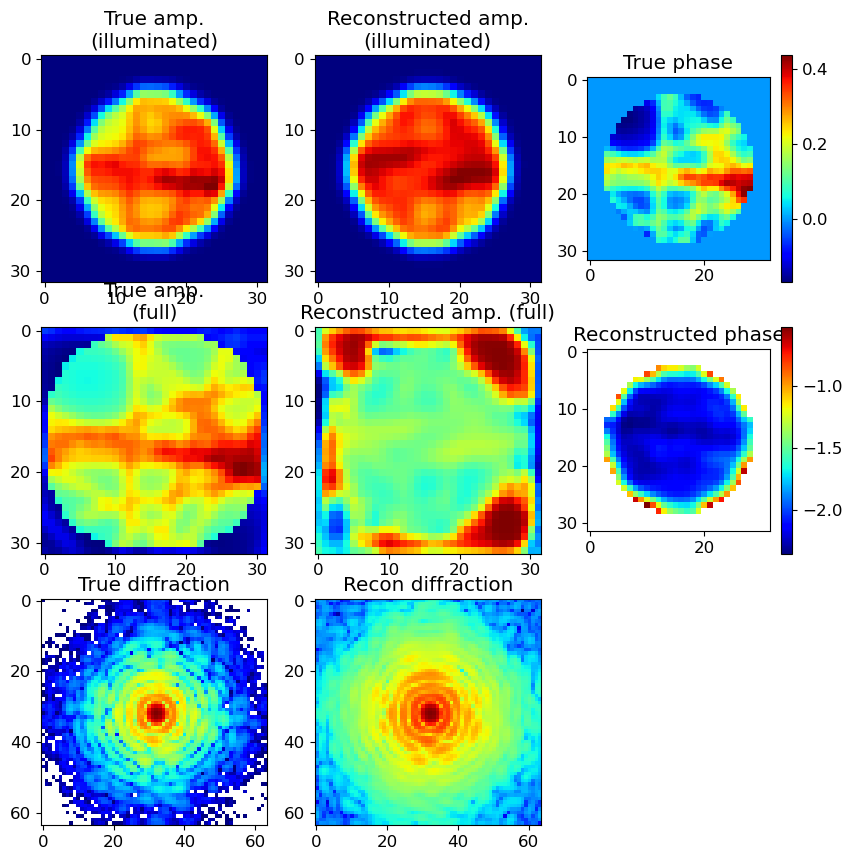

In [67]:
evaluation.summarize(0, train_pinn.pred_amp, train_pinn.reconstructed_obj, X_test, Y_I_test, Y_phi_test, probe.probe, 0);

phase min: -2.4652712 phase max: 1.3825868
phase min: -2.4652712 phase max: 1.3825868
phase min: -2.4652712 phase max: 1.3825868
phase min: -2.4652712 phase max: 1.3825868
phase min: -2.4652712 phase max: 1.3825868
phase min: -2.4652712 phase max: 1.3825868
phase min: -2.4652712 phase max: 1.3825868
phase min: -2.4652712 phase max: 1.3825868
phase min: -2.4652712 phase max: 1.3825868
phase min: -2.4652712 phase max: 1.3825868


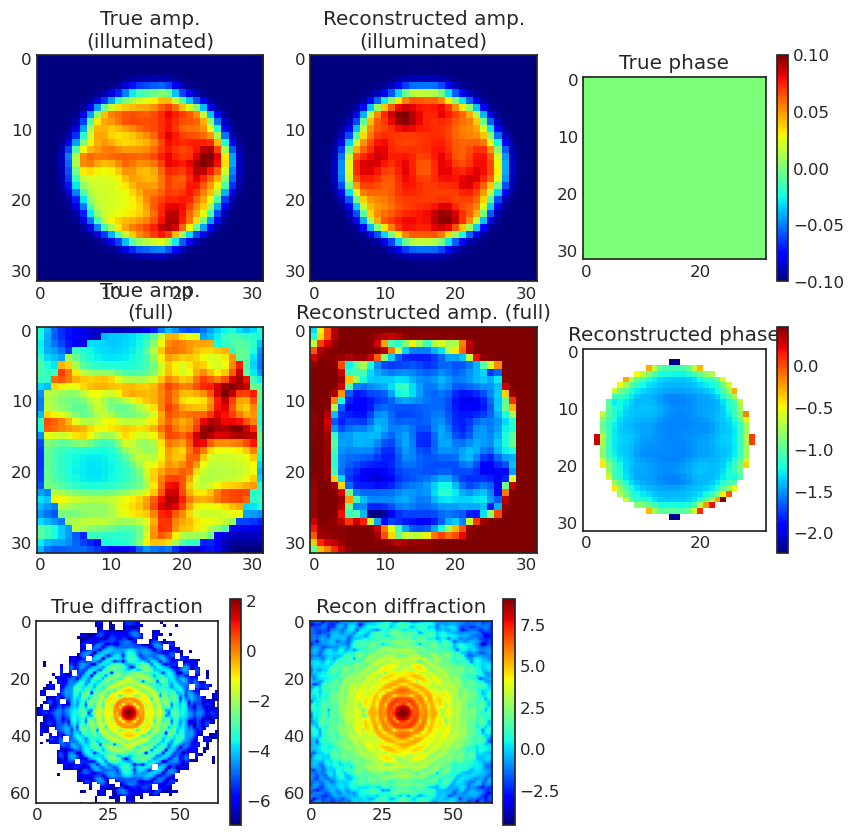

In [34]:
from ptycho import evaluation
pinn_heatmaps = [evaluation.summarize(i, train_pinn.pred_amp, train_pinn.reconstructed_obj,
                    X_test, Y_I_test, Y_phi_test, np.absolute(p.get('probe'))[:, :, 0], 0) for i in idxs]

In [70]:
img_dict_ptychopinn = ptychopinn_heatmaps[0]
img_dict_pinn = pinn_heatmaps[0]

img_dict_pinn.keys()

dict_keys(['true_amp_illuminated', 'rec_amp_illuminated', 'true_phase', 'true_amp_full', 'rec_amp_full', 'rec_phase', 'true_diffraction', 'rec_diffraction'])

# Compare reconstructions of PINN with and without overlaps

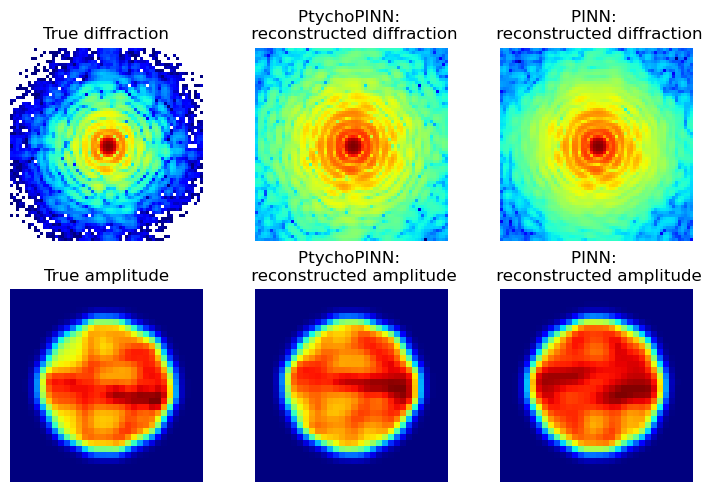

In [81]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.size'] = 10

fig, axs = plt.subplots(2, 3, figsize=(7.5, 5))

# Slicing for central 32x32 region
slice_32x32 = slice(img_dict_ptychopinn['true_amp_illuminated'].shape[0]//2 - 16, 
                    img_dict_ptychopinn['true_amp_illuminated'].shape[0]//2 + 16)

# Top row for diffraction
axs[0, 0].imshow(img_dict_ptychopinn['true_diffraction'], cmap='jet')
axs[0, 0].set_title('True diffraction')
axs[0, 0].axis('off')

axs[0, 1].imshow(img_dict_ptychopinn['rec_diffraction'], cmap='jet')
axs[0, 1].set_title('PtychoPINN: \n reconstructed diffraction')
axs[0, 1].axis('off')

axs[0, 2].imshow(img_dict_pinn['rec_diffraction'], cmap='jet')
axs[0, 2].set_title('PINN: \n reconstructed diffraction')
axs[0, 2].axis('off')

# Bottom row for amplitude
axs[1, 0].imshow(img_dict_ptychopinn['true_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet')
axs[1, 0].set_title('True amplitude')
axs[1, 0].axis('off')

axs[1, 1].imshow(img_dict_ptychopinn['rec_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet')
axs[1, 1].set_title('PtychoPINN: \n reconstructed amplitude')
axs[1, 1].axis('off')

axs[1, 2].imshow(img_dict_pinn['rec_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet')
axs[1, 2].set_title('PINN: \n reconstructed amplitude')
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern


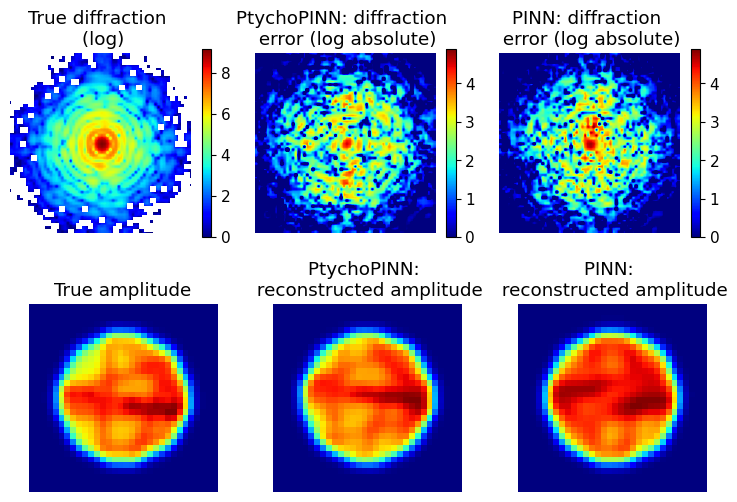

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from matplotlib import rcParams

matplotlib.rcParams['font.size'] = 11
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']

fig, axs = plt.subplots(2, 3, figsize=(7.5, 5))

# Slicing for central 32x32 region
slice_32x32 = slice(img_dict_ptychopinn['true_amp_illuminated'].shape[0]//2 - 16, 
                    img_dict_ptychopinn['true_amp_illuminated'].shape[0]//2 + 16)

# Save true_diffraction as a variable for easier subtraction
true_diffraction = img_dict_ptychopinn['true_diffraction']

# Calculate difference for PtychoPINN and PINN

diff_ptychopinn = np.log(
    np.abs(np.exp(img_dict_ptychopinn['rec_diffraction']) - np.exp(true_diffraction) * intensity_scale)
)
diff_pinn = np.log(
    np.abs(np.exp(img_dict_pinn['rec_diffraction']) - np.exp(true_diffraction) * intensity_scale)
)

# Calculate vmin and vmax (use highest non-infinite value if vmax is np.inf)
vmin = 0#np.minimum(np.min(diff_ptychopinn), np.min(diff_pinn))

# Replace np.inf with a large finite number for max
max_ptychopinn = np.max(diff_ptychopinn[np.isfinite(diff_ptychopinn)]) if np.isinf(np.max(diff_ptychopinn)) else np.max(diff_ptychopinn)
max_pinn = np.max(diff_pinn[np.isfinite(diff_pinn)]) if np.isinf(np.max(diff_pinn)) else np.max(diff_pinn)
vmax = np.maximum(max_ptychopinn, max_pinn)

# Top row for diffraction
im1 = axs[0, 0].imshow(true_diffraction + np.log(intensity_scale), cmap='jet')
axs[0, 0].set_title('True diffraction \n (log)')
axs[0, 0].axis('off')
fig.colorbar(im1, ax=axs[0, 0])

im2 = axs[0, 1].imshow(diff_ptychopinn, cmap='jet', vmin=vmin, vmax=vmax)
axs[0, 1].set_title('PtychoPINN: diffraction \n error (log absolute)')
axs[0, 1].axis('off')
fig.colorbar(im2, ax=axs[0, 1])

im3 = axs[0, 2].imshow(diff_pinn, cmap='jet', vmin=vmin, vmax=vmax)
axs[0, 2].set_title('PINN: diffraction \n error (log absolute)')
axs[0, 2].axis('off')
fig.colorbar(im3, ax=axs[0, 2])

# Bottom row for amplitude
axs[1, 0].imshow(img_dict_ptychopinn['true_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet')
axs[1, 0].set_title('True amplitude')
axs[1, 0].axis('off')

axs[1, 1].imshow(img_dict_ptychopinn['rec_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet')
axs[1, 1].set_title('PtychoPINN: \n reconstructed amplitude')
axs[1, 1].axis('off')

axs[1, 2].imshow(img_dict_pinn['rec_amp_illuminated'][slice_32x32, slice_32x32], cmap='jet')
axs[1, 2].set_title('PINN: \n reconstructed amplitude')
axs[1, 2].axis('off')

plt.tight_layout()
plt.show()


In [35]:
def normed_ff_np(arr):
    return (f.fftshift(np.absolute(f.fft2(np.array(arr)))) / np.sqrt(h * w))

In [36]:
from ptycho import fourier as f
from ptycho import tf_helper as hh

In [52]:
from ptycho import baselines as bl
# from ptycho.params import params

In [51]:
YY_I_test_full[0, clipleft: -clipright, clipleft: -clipright].shape, stitched.shape

(TensorShape([296, 296, 1]), (3, 296, 296, 1))

In [273]:
plt.rcParams["figure.figsize"] = (5, 5)

# More real- and diffraction-space reconstructions

diffraction reconstruction


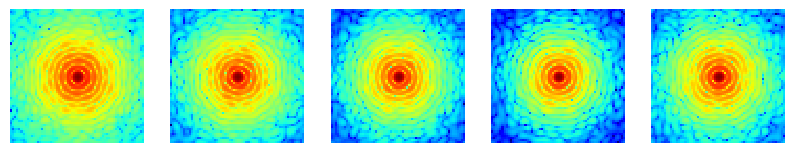

diffraction ground truth


/tmp/ipykernel_559664/1027358251.py:10: RuntimeWarning: divide by zero encountered in log
  vis.display_imgs(np.log(np.absolute(X_test[:, :, :, 0]))[i:i + off])


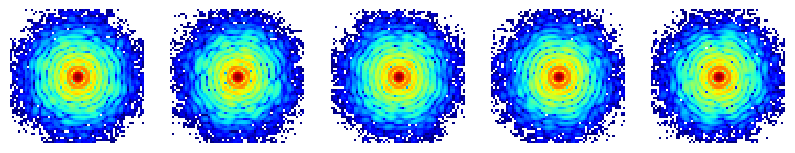

object reconstruction (amp)


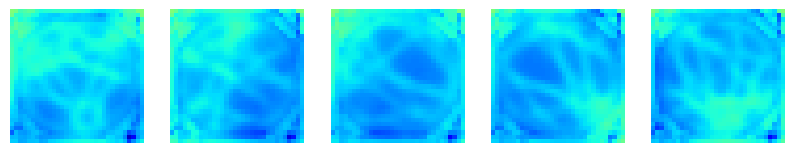

object ground truth


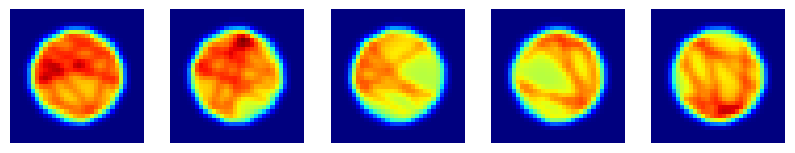

In [45]:
# !ln ../xrd_clustering/notebooks/visualization.py
from ptycho import visualization as vis
reload(vis)

off = 5

vmin = np.min(Y_I_test[:, 16:-16, 16:-16][i:i + off])
vmax = np.max(Y_I_test[:, 16:-16, 16:-16][i:i + off])

print('diffraction reconstruction')
vis.display_imgs(np.log(np.absolute(pred_amp[:, :, :, 0]))[i:i + off])

print('diffraction ground truth')
vis.display_imgs(np.log(np.absolute(X_test[:, :, :, 0]))[i:i + off])

print('object reconstruction (amp)')
vis.display_imgs(np.absolute(reconstructed_obj[:, 16:-16, 16:-16, 0])[i:i + off], vmin = vmin, vmax = vmax)
# print('object reconstruction (phase)')
# vis.display_imgs(np.angle(b[:, 16:-16, 16:-16, 0])[i:i + 10])#, vmin = vmin, vmax = vmax)
print('object ground truth')
vis.display_imgs(Y_I_test[:, 16:-16, 16:-16, 0][i:i + off], vmin = vmin, vmax = vmax)

/tmp/ipykernel_559664/266772117.py:18: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(tmp),
/tmp/ipykernel_559664/266772117.py:22: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(X_train[0, :, :, 0]), cmap = 'jet')


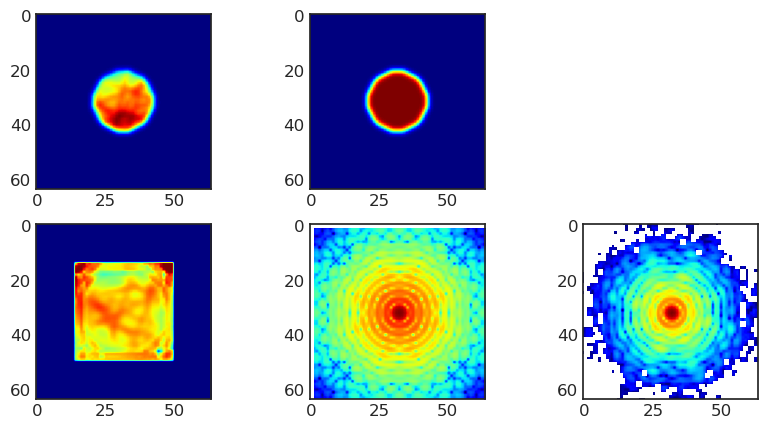

In [49]:
plt.rcParams["figure.figsize"] = (10, 5)


plt.subplot(2, 3, 1)

plt.imshow(Y_I_train[0, :, :, 0], cmap = 'jet')

plt.subplot(2, 3, 2)
plt.imshow(np.absolute(model.autoencoder.variables[-1]), cmap = 'jet')
# plt.colorbar()


plt.subplot(2, 3, 4)
plt.imshow(np.absolute(reconstructed_obj[100, :, :, 0]), cmap = 'jet')

plt.subplot(2, 3, 5)
tmp = np.absolute(f.fftshift(f.fft2(np.array(model.autoencoder.variables[-1][:, :, 0]))))
plt.imshow(np.log(tmp),
          cmap  ='jet')

plt.subplot(2, 3, 6)
plt.imshow(np.log(X_train[0, :, :, 0]), cmap = 'jet')

# for i, v in enumerate(model.autoencoder.variables):
#     print(i, v.shape)

/tmp/ipykernel_559664/3003591346.py:5: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(np.sqrt(Itest[0, :, :, 0])), cmap = 'jet')


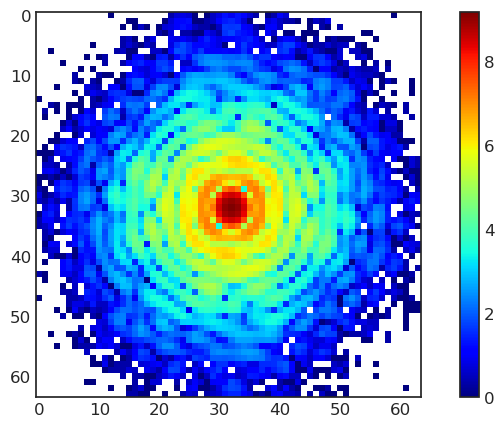

In [50]:
Itest = (X_test * p.get('intensity_scale'))**2

Itest.shape, np.max(Itest, axis = 1).max(axis = 1).mean()

plt.imshow(np.log(np.sqrt(Itest[0, :, :, 0])), cmap = 'jet')
plt.colorbar()